In [1]:
import pandas as pd
from pathlib import Path
from sad2_final_project.analysis import add_missing_metrics_from_experiment, loader_obsolete_data
from sad2_final_project.bnfinder import load_external_data

# plots
## global
import matplotlib.pyplot as plt
import seaborn as sns
## local
from sad2_final_project.analysis import plot_boxplot, plot_histogram, plot_grouped_boxplots, compute_spearman_table, plot_spearman_heatmap, compute_wilcoxon_table, plot_wilcoxon_heatmap
# system , 
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data/trajectory_length_vs_attractors1')

/home/maxi7524/repositories/SAD2_final_project


In [2]:
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
metrics_list=['TP', 'FP', 'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']
# df = add_missing_metrics_from_experiment(df, DATA_PATH, metrics_list, after_column='attractor_ratio')
df

,condition_id_num,dataset_succeeded,attractor_ratio,TP,FP,FN,precision,recall,sensitivity,AHD,...,BDe,num_nodes,update_mode,trajectory_length,n_trajectories,sampling_frequency,score_function,n_parents_per_node,rep_id,condition_id_name
0,0,False,0.776667,7.0,3.0,4.0,0.700000,0.636364,0.636364,0.350000,...,2093.753183,5,synchronous,10,50,1,MDL,"[1, 2, 3]",0,0000
1,1,False,0.744000,4.0,7.0,2.0,0.363636,0.666667,0.666667,0.450000,...,3525.393371,5,synchronous,10,50,1,MDL,"[1, 2, 3]",1,0001
2,2,False,0.851333,8.0,2.0,2.0,0.800000,0.800000,0.800000,0.200000,...,3089.352225,5,synchronous,10,50,1,MDL,"[1, 2, 3]",2,0002
3,3,False,0.844000,4.0,4.0,3.0,0.500000,0.571429,0.571429,0.583333,...,3298.020597,5,synchronous,10,50,1,MDL,"[1, 2, 3]",3,0003
4,4,False,0.862667,5.0,1.0,0.0,0.833333,1.000000,1.000000,0.050000,...,4801.738920,5,synchronous,10,50,1,MDL,"[1, 2, 3]",4,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,23395,True,0.587805,12.0,2.0,3.0,0.857143,0.800000,0.800000,0.069444,...,3650.863750,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",25,23395
23396,23396,False,0.996585,15.0,8.0,3.0,0.652174,0.833333,0.833333,0.152778,...,14077.049997,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",26,23396
23397,23397,False,1.000000,12.0,11.0,1.0,0.521739,0.923077,0.923077,0.166667,...,12617.349198,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",27,23397
23398,23398,True,0.542195,12.0,5.0,5.0,0.705882,0.705882,0.705882,0.138889,...,3865.383110,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",28,23398


CZĘŚĆ 2

In [3]:
from sad2_final_project.analysis import analyze_datasets_from_index

## DROPPING VALUES 
df_series = df.copy()
### dropping values after 
df_series['scale'] = df_series["trajectory_length"] / df_series["num_nodes"]
df_series = df_series[df_series['scale'] < 1.5]
### dropping sets that have no sense
df_series = df_series[
    (df_series["trajectory_length"] / df_series["sampling_frequency"]) > 1
]
## calculate series 
df_series = add_missing_metrics_from_experiment(df_series, DATA_PATH, metrics_list, after_column='attractor_ratio')
df_series = analyze_datasets_from_index(df_series, 'condition_id_name', DATA_PATH, 1)

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 1000/8040 conditions completed (12.4%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 2000/8040 conditions completed (24.9%)
[Progress] 3000/8040 conditions completed (37.3%)
[Progress] 4000/8040 conditions completed (49.8%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 5000/8040 conditions completed (62.2%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 6000/8040 conditions completed (74.6%)
[Progress] 7000/8040 conditions completed (87.1%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 8000/8040 conditions completed (99.5%)
[Progress] 1/8040 conditions completed (0.0%)
[Progress] 2/8040 conditions completed (0.0%)
[Progress] 3/8040 conditions completed (0.0%)
[Progress] 4/8040 conditions completed (0.0%)
[Progress] 5/8040 conditions completed (0.1%)
[Progress] 6/8040 conditions completed (0.1%)
[Progress] 7/8040 conditions completed (0.1%)
[Progress] 8/8040 conditions completed (0.1%)
[Progress] 9/8040 conditions completed (0.1%)
[Progress] 10/8040 conditions completed (0.1%)
[Progress] 11/8040 conditions completed (0.1%)
[Progress] 12/8040 conditions completed (0.1%)
[Progress] 13/8040 conditions completed (0.2%)
[Progress] 14/8040 conditions completed (0.2%)
[Progress] 15/8040 conditions completed (0.2%)
[Progress] 16/8040 conditions completed (0.2%)
[Progress] 17/8040 conditions completed (0.2%)
[Progress] 18/8040 conditions completed (0.2%)
[Progress] 19/8040 conditions completed (0.2%)
[Progress] 20/8040 conditions completed (0.2%)
[Progress] 21/8040 

In [4]:
df_series.columns

Index(['condition_id_num', 'dataset_succeeded', 'attractor_ratio', 'TP', 'FP',
       'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD',
       'SHD', 'EHD', 'SID', 'log_likelihood', 'MDL', 'BDe', 'num_nodes',
       'update_mode', 'trajectory_length', 'n_trajectories',
       'sampling_frequency', 'score_function', 'n_parents_per_node', 'rep_id',
       'condition_id_name', 'scale', 'mean_lag1_acf', 'mean_ess'],
      dtype='object')

In [5]:
table = pd.pivot_table(
    df_series,
    index='sampling_frequency',
    columns='num_nodes',
    aggfunc='size',
    fill_value=0
)
table

num_nodes,5,7,9,11,13
sampling_frequency,,,,,
1,240,480,480,240,240
2,240,480,480,240,240
3,240,480,480,240,240
4,240,480,480,240,240
5,120,360,360,240,240


In [6]:
table = pd.pivot_table(
    df_series,
    index='score_function',
    columns='num_nodes',
    aggfunc='size',
    fill_value=0
)
table

num_nodes,5,7,9,11,13
score_function,,,,,
BDE,540,1140,1140,600,600
MDL,540,1140,1140,600,600


Zadanie 1

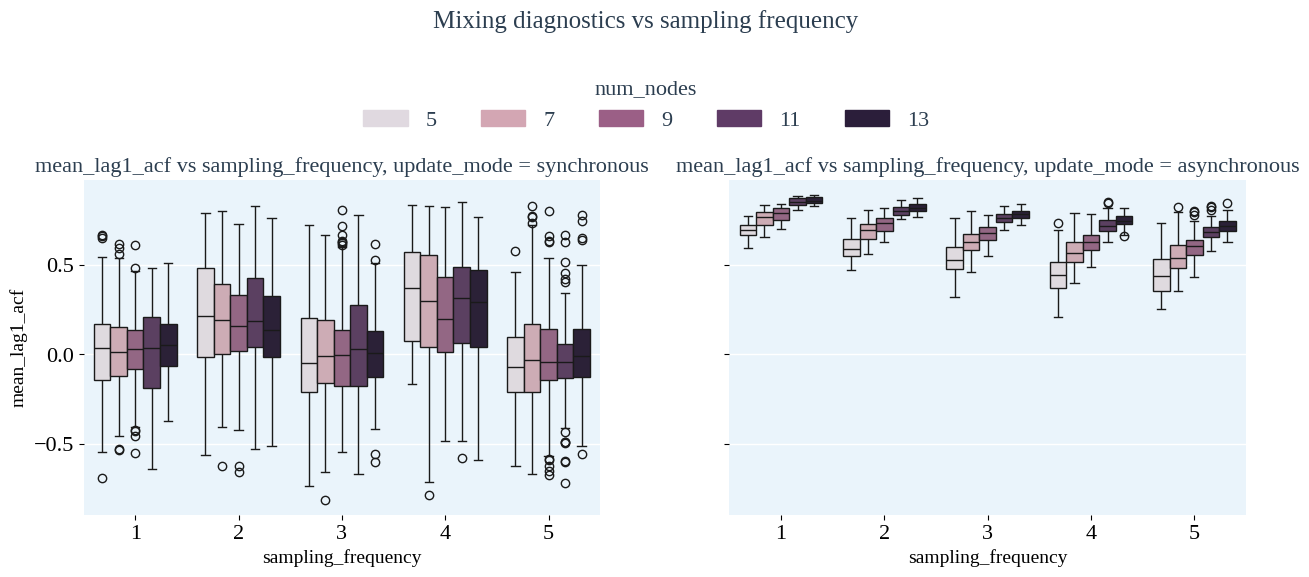

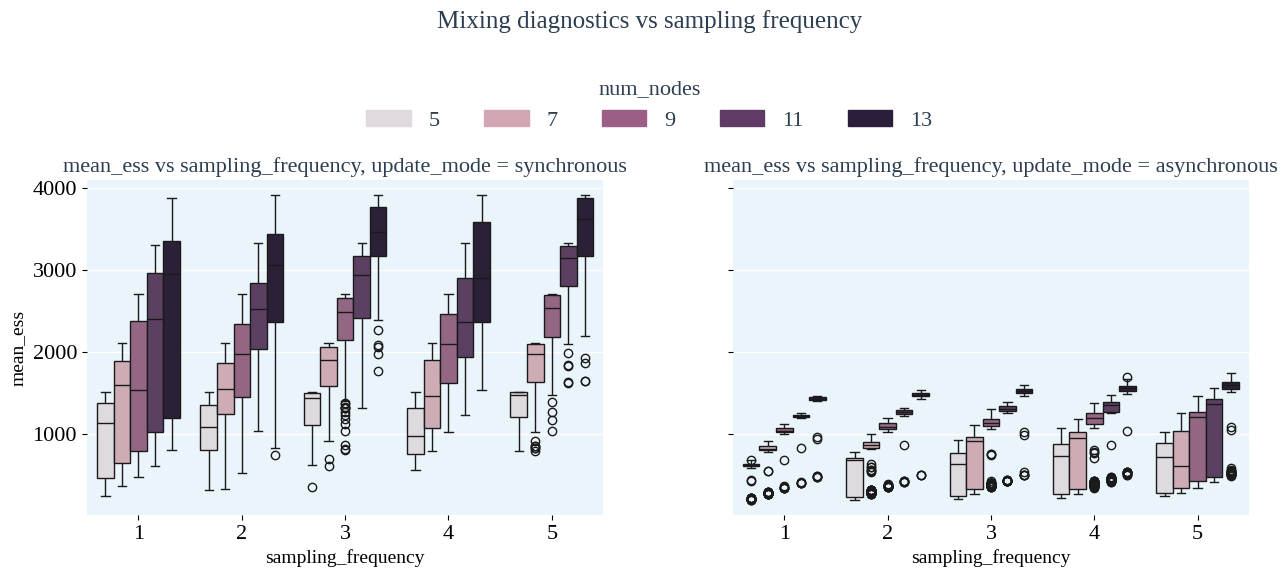

In [7]:
palette = [
    "#e0d9e0",  # najmniejsze num_nodes
    "#d3a6b3",
    "#9b5f86",
    "#5f3b66",
    "#2b1e3a"   # największe num_nodes
]

plot_grouped_boxplots(
    df=df_series,
    group_col=None,                       # ← kluczowe
    x_col="sampling_frequency",
    y_cols=["mean_lag1_acf", "mean_ess"],
    hue_col="num_nodes",
    hue_palette=palette,
    facet_col="update_mode",              # ← porównanie sync vs async
    facet_levels=["synchronous", "asynchronous"],
    main_title="Mixing diagnostics vs sampling frequency",
)



Analiza 2

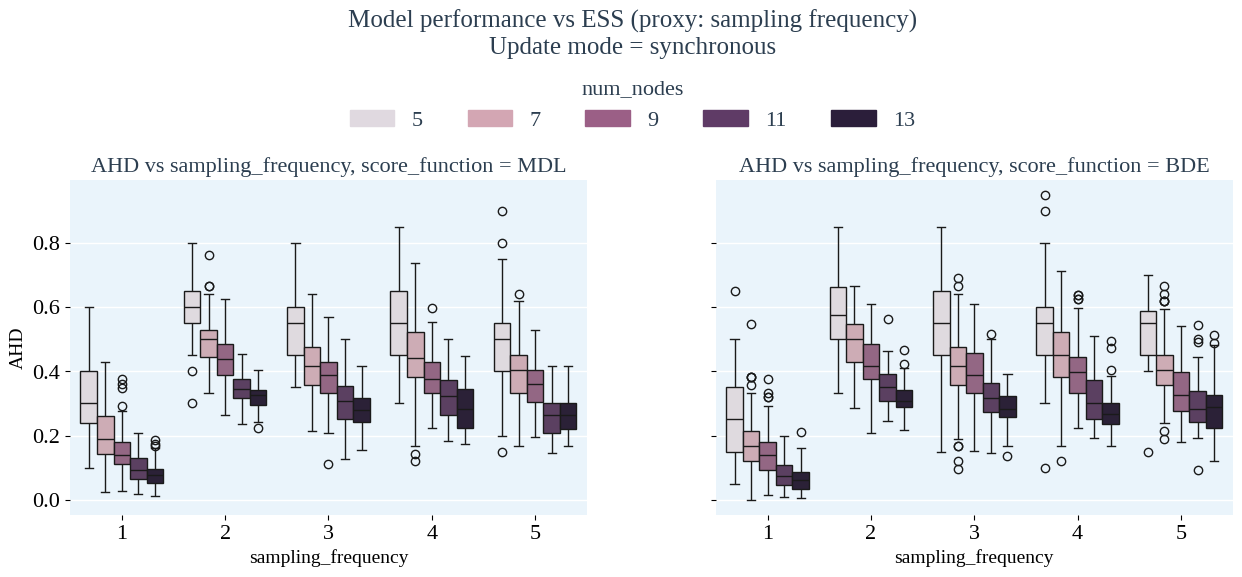

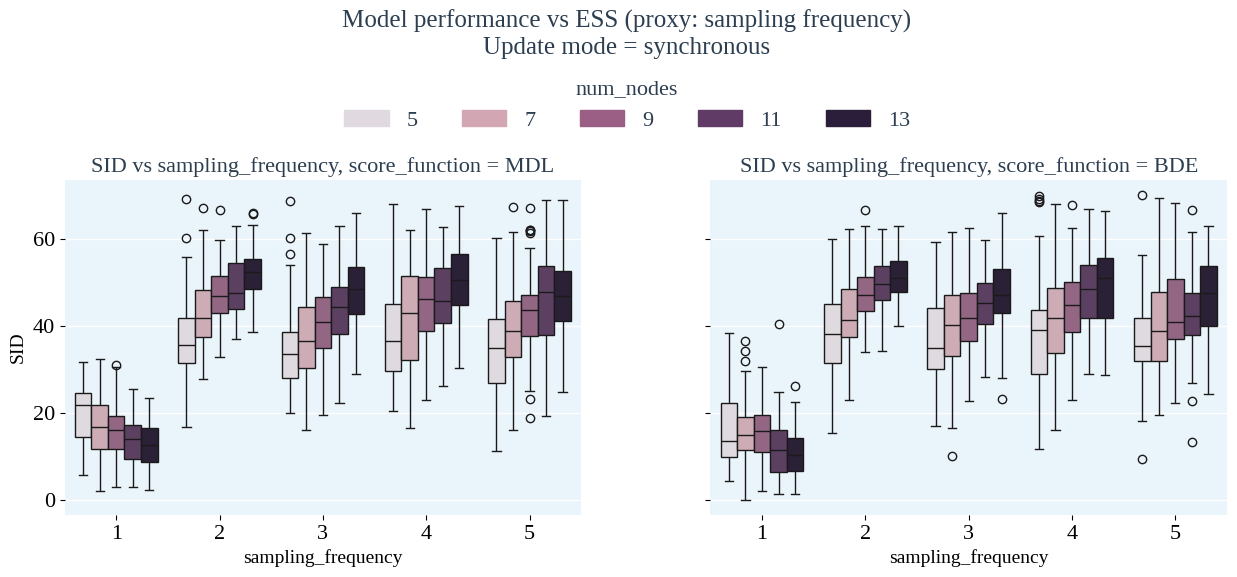

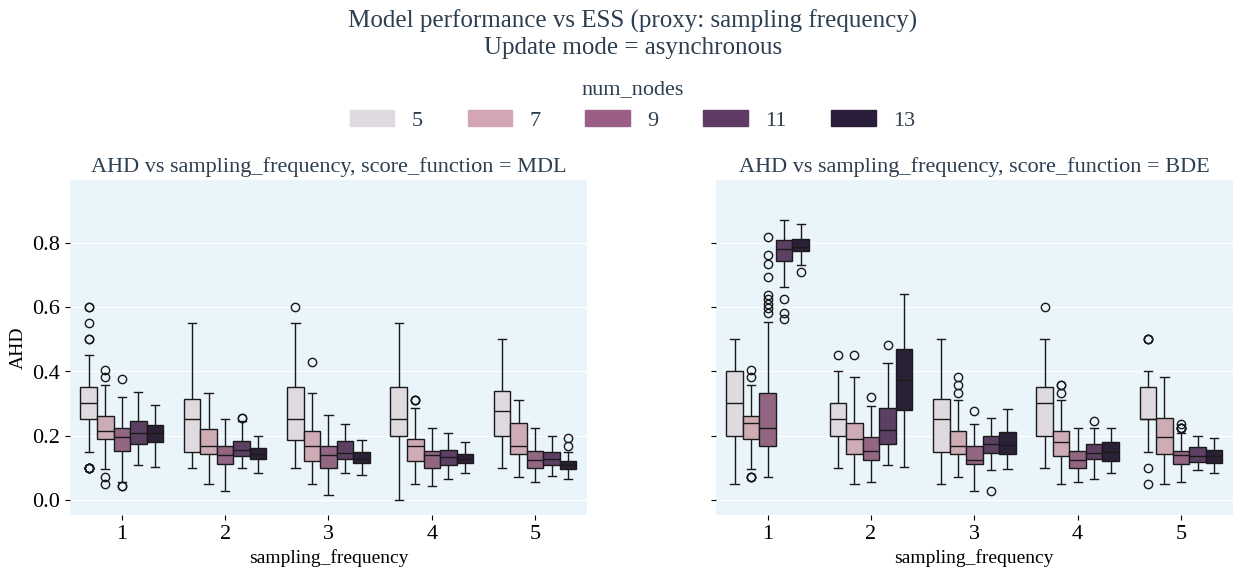

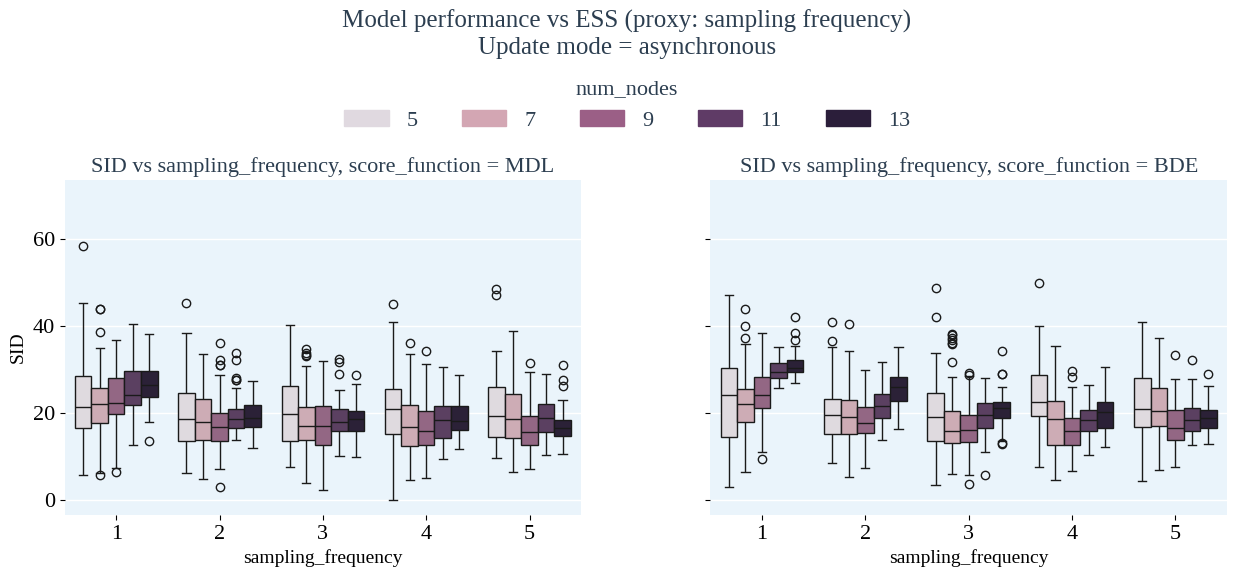

In [8]:
plot_grouped_boxplots(
    df=df_series,
    group_col="update_mode",
    x_col="sampling_frequency",
    y_cols=["AHD", "SID"],
    hue_col="num_nodes",
    hue_palette=palette,
    facet_col="score_function",
    facet_levels=["MDL", "BDE"],
    main_title="Model performance vs ESS (proxy: sampling frequency)",
    group_title_fmt="Update mode = {}"
)


Analiza 3 - spearman

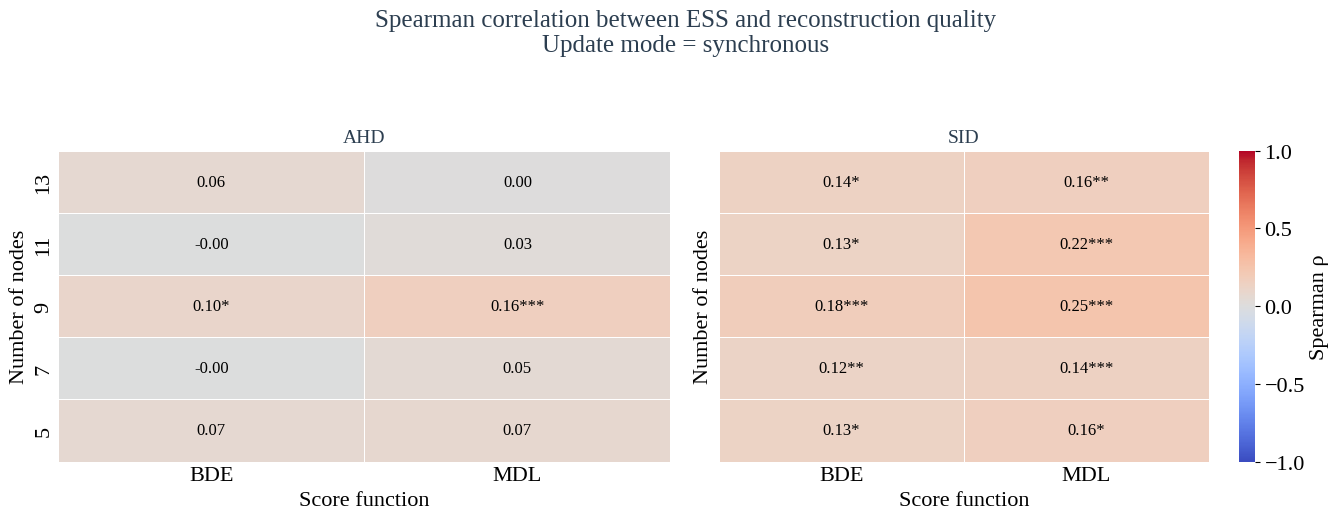

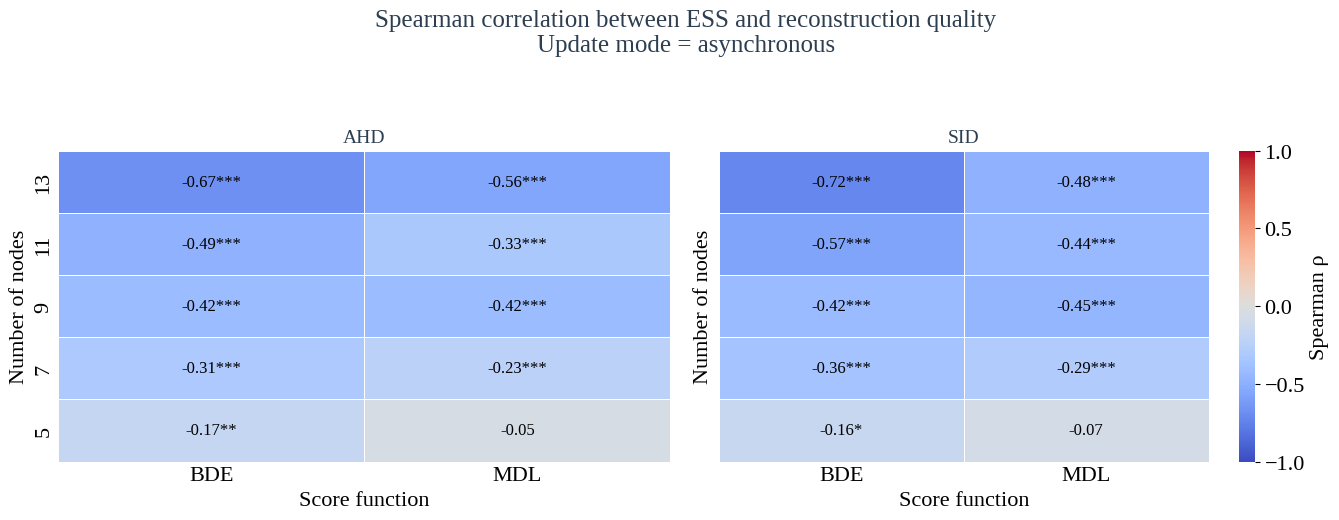

<Figure size 640x480 with 0 Axes>

In [9]:
df_spearman = compute_spearman_table(
    df_series,
    metrics=["AHD", "SID"]
)

for update_mode in ["synchronous", "asynchronous"]:

    fig, axes = plt.subplots(
        1, 2,
        figsize=(14, 5),
        sharey=True
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="AHD",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[0],
        cbar=False
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="SID",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[1],
        cbar=True
    )

    fig.suptitle(
        "Spearman correlation between ESS and reconstruction quality\n"
        f"Update mode = {update_mode}",
        fontsize=18,
        y=1.05
    )

    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()



Analiza 4 - wilcoxon

In [14]:
df_wilcoxon.columns

Index(['metric', 'sf_from', 'sf_to', 'transition', 'n_pairs', 'wilcoxon_stat',
       'p_value', 'median_diff', 'update_mode', 'score_function'],
      dtype='object')

In [ ]:

table

In [ ]:
df_wilcoxon = compute_wilcoxon_table(
    df_series,
    metrics=["AHD", "SID"],
    transitions=[(1,2), (2,3), (3,4), (4,5)], #TODO - tutaj wstawic kolejnośc z jaką chcesz sprawdzać (20, 40) ...
    sf_col='sampling_frequency' #TODO - tutaj wstawić tą kolumne co masz stałą normalizacji 
)

df_wilcoxon['n_pairs']

0     1320
1     1320
2     1320
3     1020
4     1320
5     1320
6     1320
7     1020
8     1320
9     1320
10    1320
11    1020
12    1320
13    1320
14    1320
15    1020
16    1320
17    1320
18    1320
19    1020
20    1320
21    1320
22    1320
23    1020
24    1320
25    1320
26    1320
27    1020
28    1320
29    1320
30    1320
31    1020
Name: n_pairs, dtype: int64

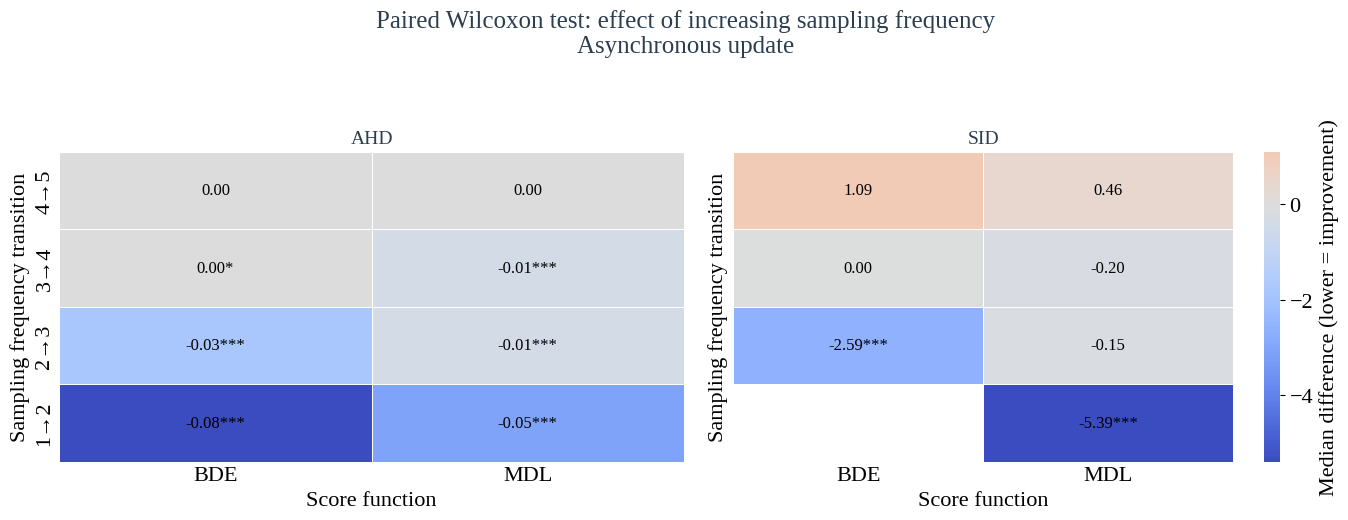

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

plot_wilcoxon_heatmap(
    df_wilcoxon,
    metric="AHD",
    update_mode="asynchronous",
    transitions_order=sorted(df_wilcoxon['transition'].unique(), reverse=True),
    ax=axes[0],
    cbar=False
)

plot_wilcoxon_heatmap(
    df_wilcoxon,
    metric="SID",
    update_mode="asynchronous",
    transitions_order=sorted(df_wilcoxon['transition'].unique(), reverse=True),
    ax=axes[1],
    cbar=True
)

fig.suptitle(
    "Paired Wilcoxon test: effect of increasing sampling frequency\n"
    "Asynchronous update",
    fontsize=18,
    y=1.05
)

plt.tight_layout()
plt.show()



IDEA DLA JOANNY 